In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

%matplotlib inline 

# Importando `.csv`

O csv possui dados separados por `;`. Logo, o método `pd.read_csv` precisa de um indicador que a separação está dessa maneira:


https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

In [5]:
bank = pd.read_csv('bank_bank-full.csv', sep=';')
bank.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no


# EDA Inicial


1) Contar o número de colunas no dataset

In [6]:
print(len(bank.columns), bank.columns)

17 Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


### Descobrindo o `shape` do dataset


In [7]:
bank.shape

(45211, 17)

### Queremos saber quantas pessoas aceitaram o produto do banco

In [8]:
recusaram = len(bank[bank['y'] == 'no'])
aceitaram = len(bank[bank['y'] == 'yes'])
total = len(bank)

print("Recusaram: ", recusaram)
print("Aceitaram: ", aceitaram)


Recusaram:  39922
Aceitaram:  5289


In [9]:
100 * recusaram/total

88.30151954170445

# CountPlot

https://seaborn.pydata.org/generated/seaborn.countplot.html?highlight=countplot#seaborn.countplot

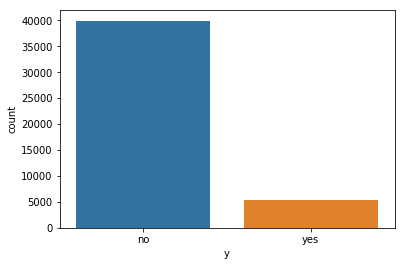

In [10]:
sns.countplot(x=bank['y'], data=bank)

In [35]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

### Vendo a relação entre a Idade e a aceitação do produto

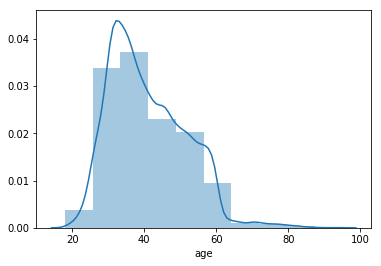

In [11]:
bank_yes = bank[bank['y'] == 'yes']
bank_no = bank[bank['y'] == 'no']


sns.distplot(bank['age'], bins=10)

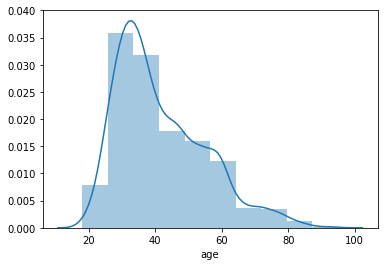

In [12]:
sns.distplot(bank_yes['age'], bins=10)

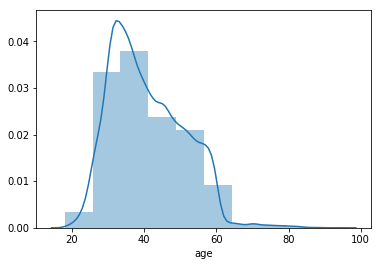

In [13]:
sns.distplot(bank_no['age'], bins=10)

In [15]:
total_pessoas_aceitaram_por_idade = bank_yes.groupby('age')['age'].count()
total_pessoas_por_idade = bank.groupby('age')['age'].count()

porcentagem_aceitaram = pd.DataFrame(100 * total_pessoas_aceitaram_por_idade/total_pessoas_por_idade)

### Regressão das idades

Esse plot tem a intenção de mostrar se há alguma relação entre a idade e a aceitação.

Foi criado um dataframe `bank_plot` so para não mexer diretamente no DF `bank`. 


plot: 

https://seaborn.pydata.org/generated/seaborn.lmplot.html

/home/ronyell/Documents/ML/virtual/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


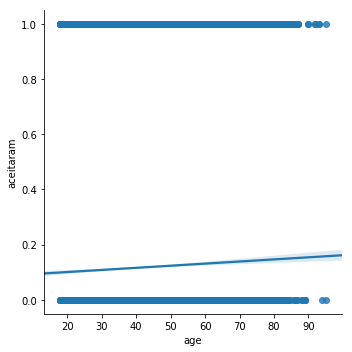

In [16]:
bank_plot = bank
bank_plot['aceitaram'] = bank_plot['y'].apply(lambda x: 1 if x == 'yes' else 0)
sns.lmplot(x='age',y='aceitaram',data=bank_plot)

In [103]:
bank_plot['contact']

0          unknown
1          unknown
2          unknown
3          unknown
4          unknown
5          unknown
6          unknown
7          unknown
8          unknown
9          unknown
10         unknown
11         unknown
12         unknown
13         unknown
14         unknown
15         unknown
16         unknown
17         unknown
18         unknown
19         unknown
20         unknown
21         unknown
22         unknown
23         unknown
24         unknown
25         unknown
26         unknown
27         unknown
28         unknown
29         unknown
           ...    
45181     cellular
45182     cellular
45183     cellular
45184     cellular
45185     cellular
45186     cellular
45187     cellular
45188     cellular
45189     cellular
45190     cellular
45191     cellular
45192     cellular
45193     cellular
45194     cellular
45195     cellular
45196     cellular
45197     cellular
45198     cellular
45199     cellular
45200     cellular
45201     cellular
45202     ce

In [110]:
def transforma_contact(linha):
    if linha == 'cellular':
        return 0
    elif linha == 'telephone':
        return 1
    elif linha == 'unknown':
        return 2

bank_plot['contact'].apply(transforma_contact)
bank_plot['job'].unique()
bank_plot['education'].unique()
bank_plot

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,aceitaram
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no,0
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no,0
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no,0
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no,0
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no,0


# A fazer

- Mudar o nome da coluna `y` para um mais significativo

- 